In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import warnings
import datetime

os.chdir(  "/Users/etmu9498/research/code/scripts")
import tc_metadata
import make_plots
import helper_fns

In [3]:
# get metadata for a specific tc example 

# new data paths
tdr_new_path = "/Users/etmu9498/research/data/tdr-new"
crl_new_path = "/Users/etmu9498/research/data/crl-new"


# pick an example
tcname = 'sam'
dataset = 2
metadata = tc_metadata.all_data( tc= tcname)

# load the old data
crl_name = tc_metadata.choose_crl_date( metadata[ 'dates'][ dataset], metadata[ 'crl_list'])
inbound_name, outbound_name = tc_metadata.choose_tdr_data( tcname, metadata[ 'tdr_list'], dataset)

# load the new data
tdr_new_name, crl_new_name = tc_metadata.choose_new_data( tcname, dataset)

print( crl_name)
print( inbound_name)
print( outbound_name)
print( tdr_new_name)
print( crl_new_name)

os.chdir( crl_new_path)
new_crl = xr.open_dataset( crl_new_name)
new_crl

P3_20210926H1_220900-255058.cdf
210926H1_2457_vert_inbound.nc
210926H1_2457_vert_outbound.nc
tdr-sam-09-26-eye-3.nc
crl-sam-09-26-eye-3.nc


<xarray.Dataset>
Dimensions:             (Time: 1200, layers: 594, distance: 1199, height: 1200,
                         time: 594, Lon: 1200, Lat: 1200)
Coordinates:
    time                (Time) float32 ...
    H                   (layers) float32 ...
  * distance            (distance) float64 -169.5 -169.2 -169.0 ... 143.7 144.0
  * Lon                 (Lon) float32 -49.95 -49.95 -49.95 ... -51.72 -51.72
  * Lat                 (Lat) float32 13.23 13.23 13.23 ... 15.51 15.51 15.51
Dimensions without coordinates: Time, layers, height
Data variables:
    ProductionDateTime  |S24 ...
    VersionID           int16 ...
    LSR                 (height, time) float32 ...
    WVMR                (height, time) float32 ...
    T                   (height, time) float32 ...
    P_ch1               (height, time) float32 ...
Attributes:
    global_att:    This file is generated with our Compact Raman lidar measur...
    global_att1:   The data for each flight is mapped to the same height bin ...
    global_att2:  For Question about this product, contact Zhien Wang, 
    global_att3:   University of Colorado, Boulder at zhien.wang@colorado.edu
    global_att4:  This Dataset is a subset of the full CRL dataset for 09-26-...

(-139.5, 174.0)

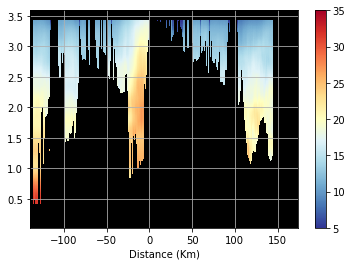

In [5]:
newi1 = 0
newi2 = len( new_crl.time) - 1
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
new_dist = new_crl.distance

temp = new_crl.T[newi1:newi2, :].where( new_crl.T[newi1:newi2, :].values < 50).transpose()
plt.pcolormesh( new_dist, - new_crl.H, temp, cmap=color_map, vmin=5, vmax=35)
plt.colorbar()
ax = plt.gca()
ax.set_facecolor('k')
plt.grid('on')
plt.xlabel( "Distance (Km)")
plt.xlim( [ np.nanmin( new_dist) + 30, np.nanmax( new_dist) + 30])
